In [1]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

Load dataset and get brief information about it.

In [2]:
# Aerial LiDAR dataset
lidar_file = "CA_SoCal_Wildfires_B4_2018_Sedgwick_TREX24_1.laz"
pointcloud_data = laspy.read(lidar_file)

In [3]:
# Information about LiDAR data
print("Point Format:", pointcloud_data.header.point_format)
print("Number of Points:", pointcloud_data.header.point_count)

Point Format: <PointFormat(3, 0 bytes of extra dims)>
Number of Points: 2734782


Extract attributes from LiDAR data.

In [4]:
x = np.array(pointcloud_data.x)
y = np.array(pointcloud_data.y)
z = np.array(pointcloud_data.z)

intensity = np.array(pointcloud_data.intensity)
classification = np.array(pointcloud_data.classification)
return_number = np.array(pointcloud_data.return_number)

Create dataframe with information extracted.

In [5]:
pointcloud_df = pd.DataFrame({'x': x, 'y': y, 'z': z, 
                   'intensity': intensity, 
                   'classification': classification, 
                   'return_number': return_number})

Use describe() to have a brief overview of min/max values, mean, standard deviation to better understand the data, detect outliers, and data quality issues.

In [6]:
print(pointcloud_df.describe())

                  x             y             z     intensity  classification  \
count  2.734782e+06  2.734782e+06  2.734782e+06  2.734782e+06    2.734782e+06   
mean  -2.162712e+06  1.567589e+06  3.944201e+02  3.082709e+04    1.198883e+00   
std    4.065550e+01  1.441702e+02  1.403060e+01  8.403977e+03    4.014211e-01   
min   -2.162798e+06  1.567307e+06  3.644600e+02  0.000000e+00    1.000000e+00   
25%   -2.162742e+06  1.567470e+06  3.839200e+02  2.830000e+04    1.000000e+00   
50%   -2.162714e+06  1.567599e+06  3.938800e+02  3.250000e+04    1.000000e+00   
75%   -2.162686e+06  1.567718e+06  4.061500e+02  3.630000e+04    1.000000e+00   
max   -2.162611e+06  1.567841e+06  4.402700e+02  4.900000e+04    7.000000e+00   

       return_number  
count   2.734782e+06  
mean    1.131397e+00  
std     3.640479e-01  
min     1.000000e+00  
25%     1.000000e+00  
50%     1.000000e+00  
75%     1.000000e+00  
max     5.000000e+00  


Check for missing values to adjust accordingly if necessary. There are none.

In [7]:
print(pointcloud_df.isnull().sum())

x                 0
y                 0
z                 0
intensity         0
classification    0
return_number     0
dtype: int64


Plot classification to see the different objects present to separate the terrain. Check value count for exact count for each code.

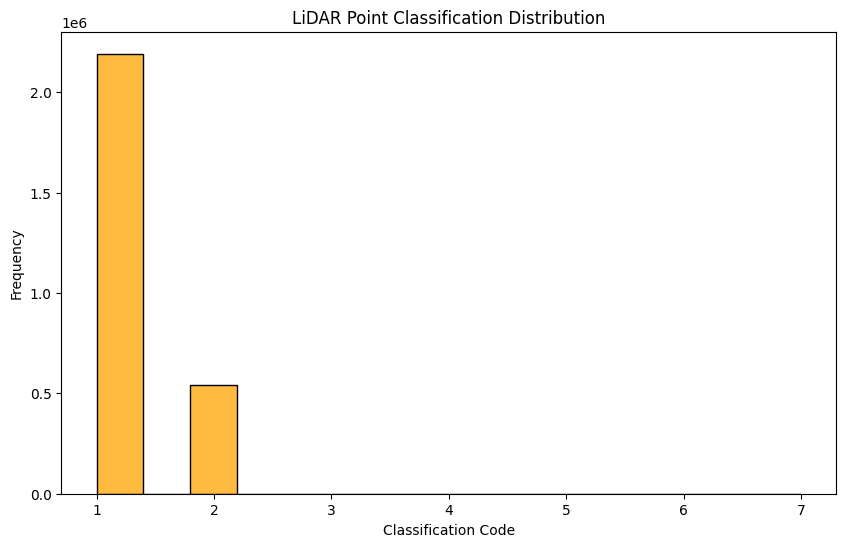

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(pointcloud_df["classification"], bins=15, kde=False, color='orange')
plt.title("LiDAR Point Classification Distribution")
plt.xlabel("Classification Code")
plt.ylabel("Frequency")
plt.show()

In [9]:
pointcloud_df["classification"].value_counts()

classification
1    2191704
2     542913
7        165
Name: count, dtype: int64

Complete return number analysis to identify each classification of object and different surfaces.

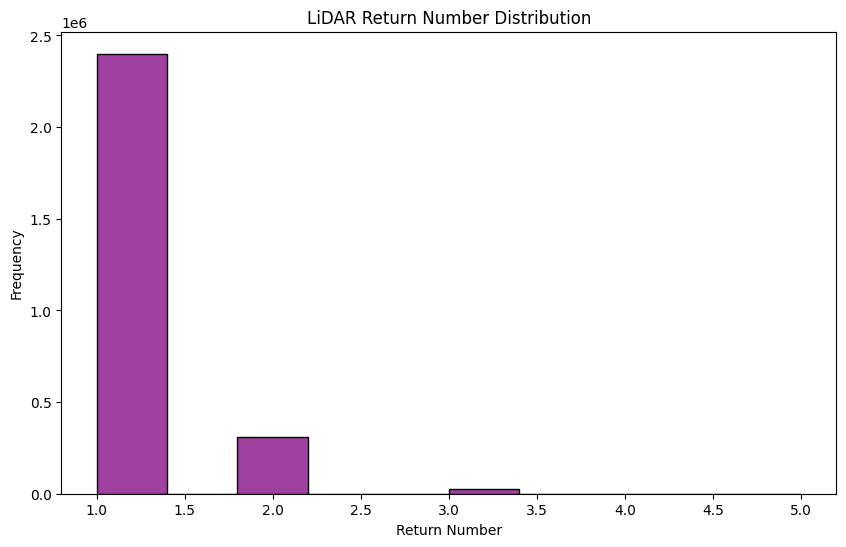

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(pointcloud_df["return_number"], bins=10, kde=False, color='purple')
plt.title("LiDAR Return Number Distribution")
plt.xlabel("Return Number")
plt.ylabel("Frequency")
plt.show()

View the 2D spatial coverage of the LiDAR dataset with the elevation encoded.

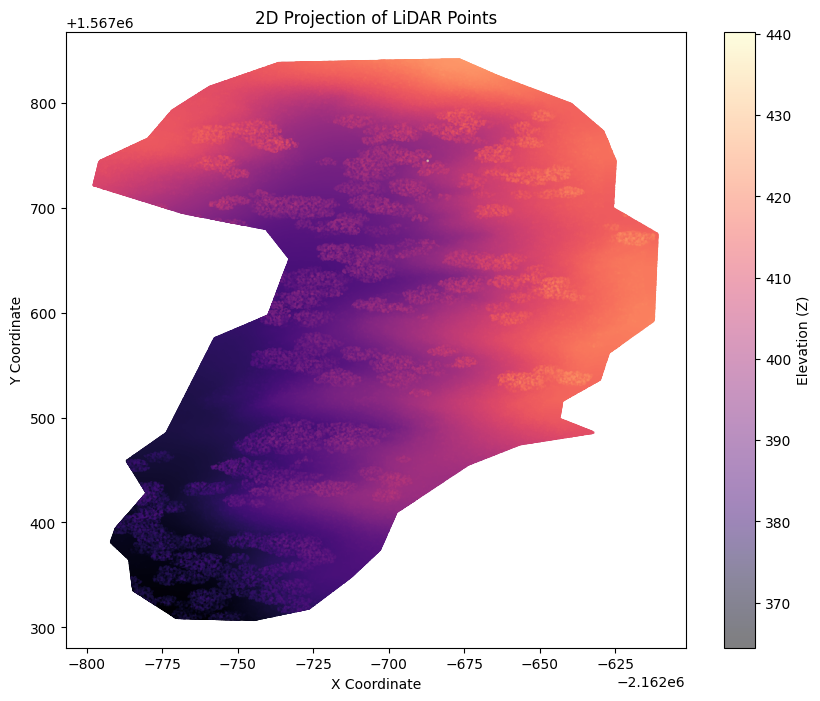

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(pointcloud_df["x"], pointcloud_df["y"], s=1, alpha=0.5, c=pointcloud_df["z"], cmap="magma")
plt.colorbar(label="Elevation (Z)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("2D Projection of LiDAR Points")
plt.show()

Here is the heatmap of the density of the given points for clarity of terrain distribution.

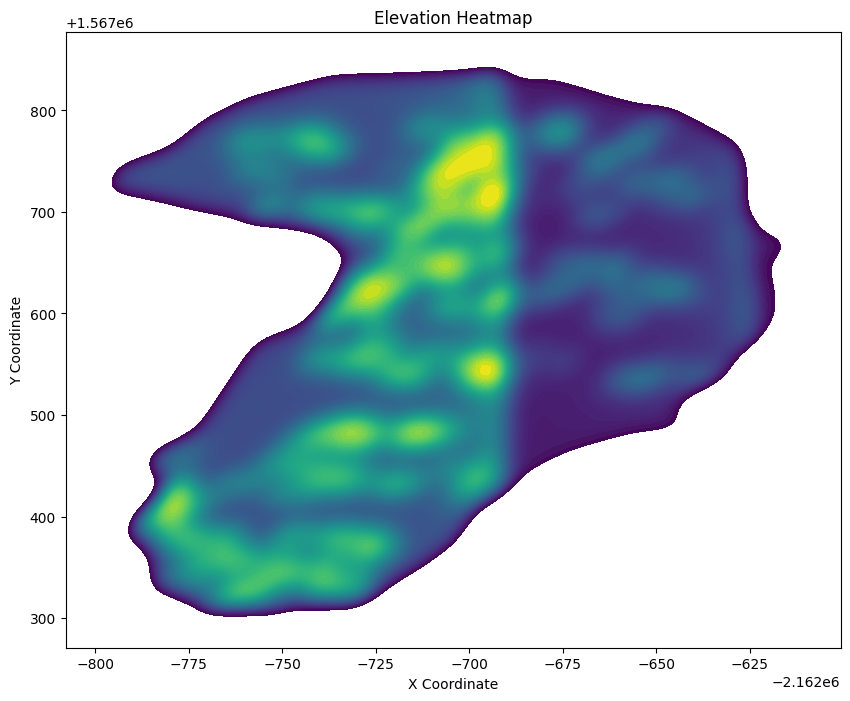

In [12]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=pointcloud_df["x"], y=pointcloud_df["y"], fill=True, cmap="viridis", levels=100)
plt.title("Elevation Heatmap")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

Elevation histogram to show the terrain variation and different surface layers.

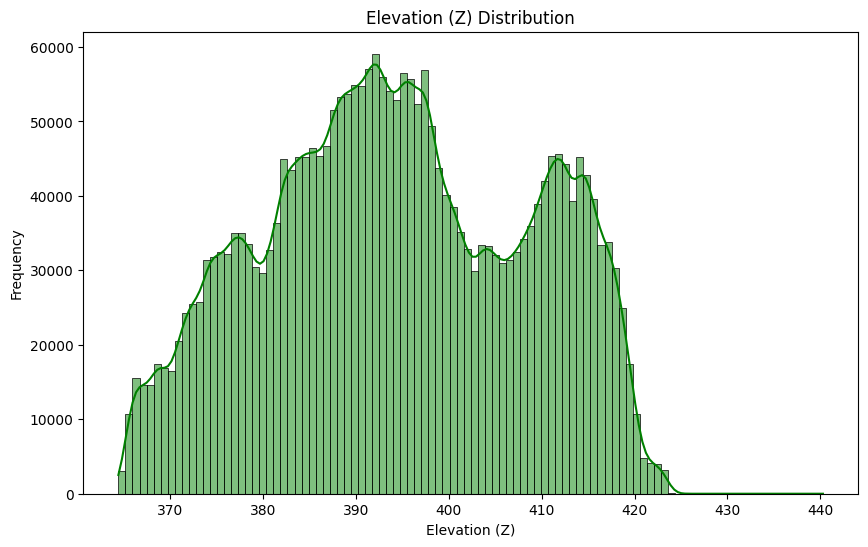

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(pointcloud_df["z"], bins=100, kde=True, color='green')
plt.title("Elevation (Z) Distribution")
plt.xlabel("Elevation (Z)")
plt.ylabel("Frequency")
plt.show()

View side profile of terrain to see distinguish different greenery.

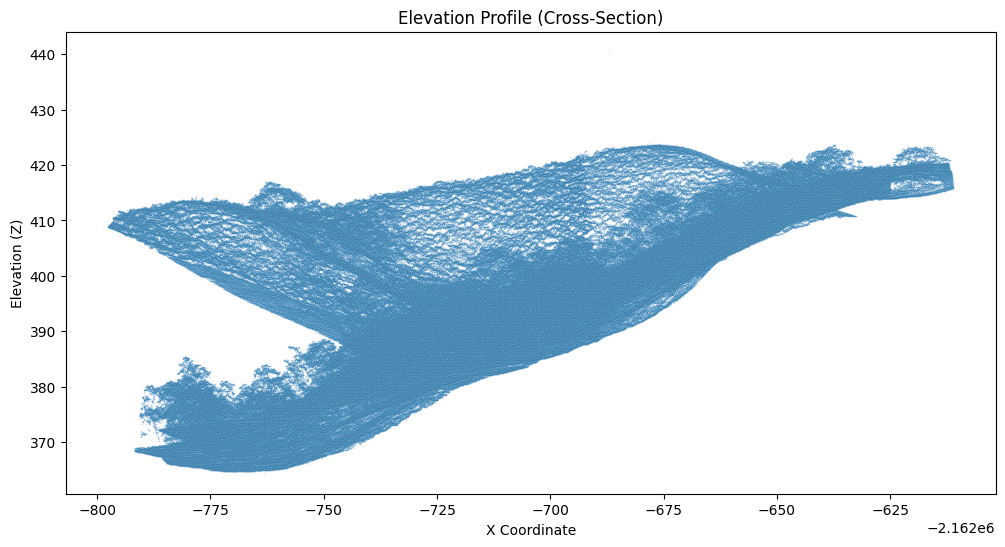

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=pointcloud_df["x"], y=pointcloud_df["z"], alpha=0.2, s=1)
plt.title("Elevation Profile (Cross-Section)")
plt.xlabel("X Coordinate")
plt.ylabel("Elevation (Z)")
plt.show()

Gives a full perspective view of the LiDAR scan.

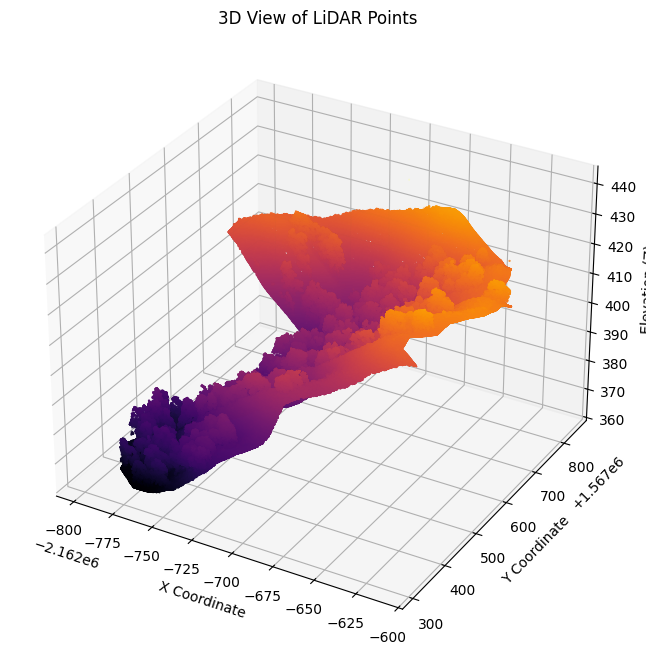

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pointcloud_df["x"], pointcloud_df["y"], pointcloud_df["z"], c=pointcloud_df["z"], cmap='inferno', s=0.1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Elevation (Z)")
plt.title("3D View of LiDAR Points")
plt.show()